## 28단계: 함수 최적화

> DeZero는 이제 미분을 자동으로 계산할 줄 압니다. \
미분은 다양한 분야에서 다양한 용도로 활용되며, 그중 가장 중요한 용도로 함수 최적화를 들 수 있습니다. \
이번 단계에서는 구체적인 함수를 대상으로 최적화를 해보겠습니다.

### 28.1 로젠브록 함수

로젠브록 함수는 다음과 같다.

<img src="images/식 28.1.png" width=500/>

사실은 상수항들이 임의의 정수이지만, 보통 벤치마크에서는 위의 식을 사용한다.

또한 함수를 3차원 플롯에 표현하면 다음과 같다.

<img src="images/그림 28-1.png" width=500/>

### 28.2 미분 계산하기

DeZero를 이용하여 $(x_0, x_1) = (0.0, 2.0)$에서의 미분 ($\frac{\partial y}{\partial x_0}$와 $\frac{\partial y}{\partial x_1}$)을 계산해보자.

In [1]:
import numpy as np
from dezero import Variable

def rosenbrock(x0, x1):
    y = 100 * (x1 - x0**2)**2 + (1 - x0)**2
    return y

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

-2.0 400.0


위 코드 실행 결과 (-2.0, 400.0)이라는 기울기(gradient) 벡터가 나왔다. 기울기 벡터는 해당 지점에서 함수의 출력을 가장 크게 하는 방향을 가리킨다.

### 28.3 경사하강법 구현

기울기 벡터를 따라 이동하고, 그 지점에서 다시 기울기 벡터를 구하는 작업을 반복하면 점차 최댓값(혹은 최솟값) 지점에 접근하리라 기대할 수 있다. 이것이 경사하강법(gradient descent)이다.

In [2]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
lr = 1e-3  # 학습률
iters = 1000  # 반복 횟수

for i in range(iters):
    if i == 0 or i % 100 == 99:
        print(f"[{i+1}/{iters}] x0: {x0.data:.5f}, x1: {x1.data:.5f}")
    
    y = rosenbrock(x0, x1)
    
    x0.cleargrad()
    x1.cleargrad()
    y.backward()
    
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

[1/1000] x0: 0.00000, x1: 2.00000
[100/1000] x0: 0.23327, x1: 0.05149
[200/1000] x0: 0.34007, x1: 0.11257
[300/1000] x0: 0.41852, x1: 0.17228
[400/1000] x0: 0.47929, x1: 0.22711
[500/1000] x0: 0.52835, x1: 0.27679
[600/1000] x0: 0.56914, x1: 0.32178
[700/1000] x0: 0.60383, x1: 0.36266
[800/1000] x0: 0.63385, x1: 0.39998
[900/1000] x0: 0.66016, x1: 0.43418
[1000/1000] x0: 0.68349, x1: 0.46565


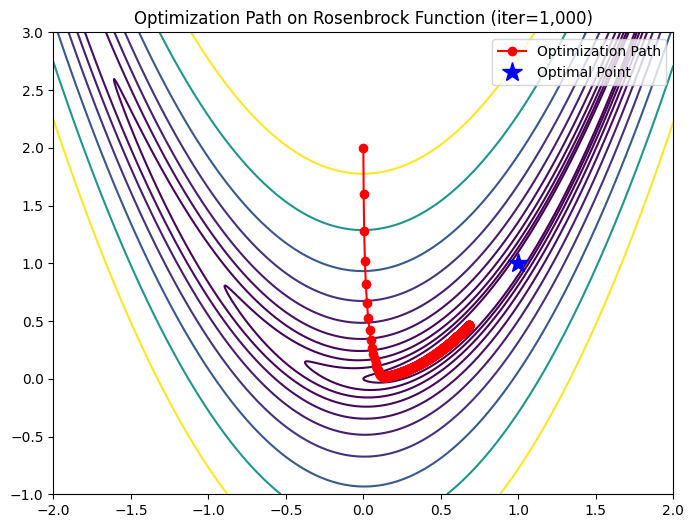

In [3]:
import matplotlib.pyplot as plt

# Generate grid for contour plot
X = np.linspace(-2, 2, 1000)
Y = np.linspace(-1, 3, 1000)
X, Y = np.meshgrid(X, Y)
Z = 100 * (Y - X**2)**2 + (1 - X)**2

# Plot contour with fewer levels
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=np.logspace(0, 2.5, 10), cmap='viridis')  # Reduced levels
plt.title(f'Optimization Path on Rosenbrock Function (iter={iters:,d})')

# Plot optimization progress
x0_vals = []
x1_vals = []

# Reset variables for optimization progress tracking
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

for i in range(iters):
    x0_vals.append(x0.data.copy())  # Track x0
    x1_vals.append(x1.data.copy())  # Track x1
    
    y = rosenbrock(x0, x1)
    x0.cleargrad()
    x1.cleargrad()
    y.backward()
    
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

# Plot the optimization path
plt.plot(x0_vals, x1_vals, 'o-', color='red', label='Optimization Path')
plt.plot(1.0, 1.0, 'b*', markersize=15, label='Optimal Point')
plt.legend()
plt.show()

0.9944984367782456 0.9890050527419593


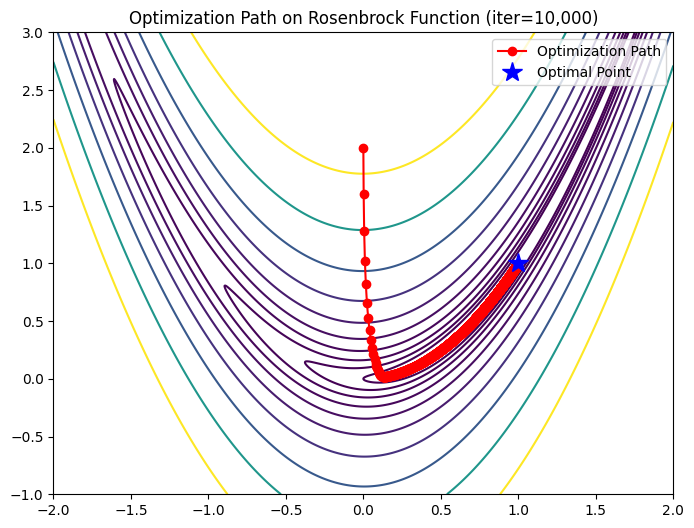

In [4]:
# Set iterations to 10000
iters = 10000

# Plot contour with fewer levels
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=np.logspace(0, 2.5, 10), cmap='viridis')  # Reduced levels
plt.title(f'Optimization Path on Rosenbrock Function (iter={iters:,d})')

# Plot optimization progress
x0_vals = []
x1_vals = []

# Reset variables for optimization progress tracking
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

for i in range(iters):
    x0_vals.append(x0.data.copy())  # Track x0
    x1_vals.append(x1.data.copy())  # Track x1
    
    y = rosenbrock(x0, x1)
    x0.cleargrad()
    x1.cleargrad()
    y.backward()
    
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

# Show the final values
print(x0.data, x1.data)

# Plot the optimization path
plt.plot(x0_vals, x1_vals, 'o-', color='red', label='Optimization Path')
plt.plot(1.0, 1.0, 'b*', markersize=15, label='Optimal Point')
plt.legend()
plt.show()

iter 횟수를 더 늘리면 최적점 (1.0, 1.0)에 간신히 도착하지만, 너무 반복 횟수가 많다. 다음 단계에서는 또 다른 최적화 기법을 소개한다.